In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import csv
import pandas as pd

data = pd.read_csv('data/GlobalLandTemperaturesByCity.csv',sep=',',index_col=False)

poland_data = data[data['Country'] == 'Poland']

poland_data.to_csv('poland_data.csv',index=False)

In [4]:
# Listing unique cities in poland_data

list_city = list(pd.unique(poland_data['City']))
list_city

['Bialystok',
 'Bielsko Biala',
 'Bydgoszcz',
 'Bytom',
 'Chorzow',
 'Cracow',
 'Czestochowa',
 'Dabrowa Gornicza',
 'Elblag',
 'Gdansk',
 'Gdynia',
 'Gliwice',
 'Gorzow Wielkopolski',
 'Kalisz',
 'Katowice',
 'Kielce',
 'Koszalin',
 'Legnica',
 'Lublin',
 'Olsztyn',
 'Opole',
 'Plock',
 'Poznan',
 'Radom',
 'Ruda Slaska',
 'Rybnik',
 'Rzeszow',
 'Sosnowiec',
 'Szczecin',
 'Tarnow',
 'Torun',
 'Tychy',
 'Walbrzych',
 'Warsaw',
 'Wloclawek',
 'Wroclaw',
 'Zabrze',
 'Zielona Gora']

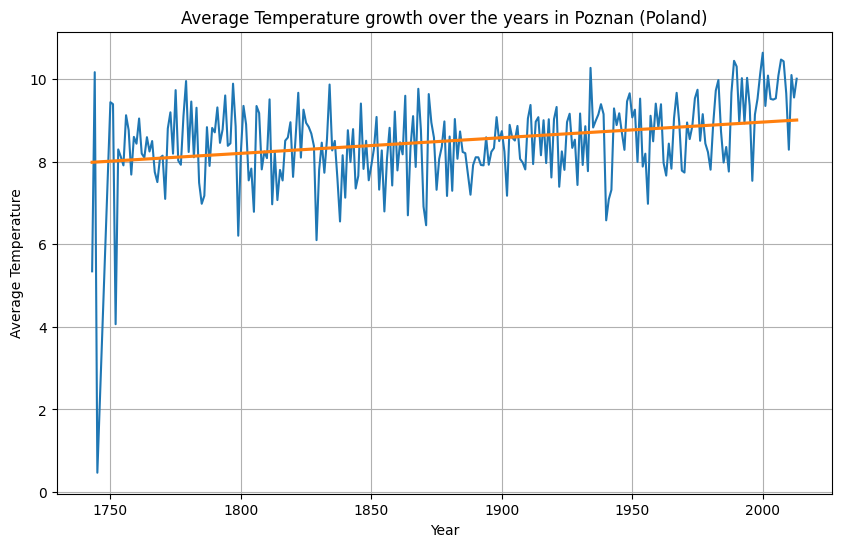

In [5]:
# I choose Poznan as the main city, now i want to create a visualization that will show the growth of temperature over the years

import seaborn as sns
import matplotlib.pyplot as plt


# creating Poznan dataset
df_poznan = poland_data[poland_data['City']=='Poznan']

# extracting year form date
df_poznan['dt'] = pd.to_datetime(df_poznan['dt'])
df_poznan['Year'] = df_poznan['dt'].dt.year

# dropping NA values
df_poznan.dropna(subset=['AverageTemperature'],inplace=True)

plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Year',y='AverageTemperature',data=df_poznan,ci=None)
sns.regplot(x='Year', y='AverageTemperature',data=df_poznan,ci=None,scatter=False,ax=ax)

plt.title("Average Temperature growth over the years in Poznan (Poland)")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.grid(True)
plt.show()




               dt  AverageTemperature  AverageTemperatureUncertainty  \
925539 1743-11-01               2.347                          1.799   
925544 1744-04-01               7.411                          3.192   
925545 1744-05-01              11.046                          1.533   
925546 1744-06-01              14.492                          1.329   
925547 1744-07-01              16.841                          1.284   

             City Country Latitude Longitude  Year  
925539  Bialystok  Poland   53.84N    23.18E  1743  
925544  Bialystok  Poland   53.84N    23.18E  1744  
925545  Bialystok  Poland   53.84N    23.18E  1744  
925546  Bialystok  Poland   53.84N    23.18E  1744  
925547  Bialystok  Poland   53.84N    23.18E  1744  


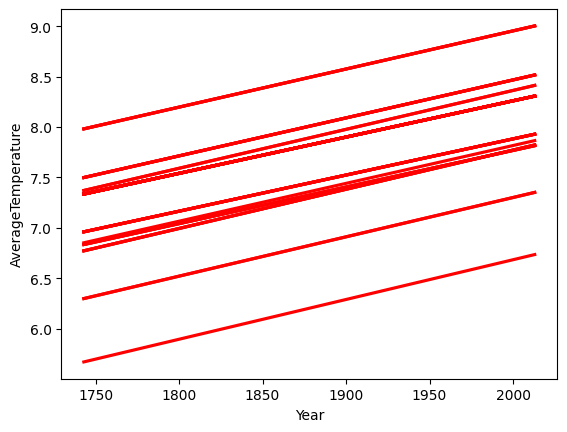

In [43]:
# now I want to create a new dataframe that contains countries column and column with value that is calculated by subtracing highest value on regression line by lowest value

# cleaning dataset to prevent future problems with NA values
df_cleaned = poland_data.dropna(subset=['AverageTemperature'])

df_cleaned['dt'] = pd.to_datetime(df_cleaned['dt'])
df_cleaned['Year'] = df_cleaned['dt'].dt.year


# creating dataframe that will contains cities and said subtraction values
result_df = pd.DataFrame(columns=['City', 'Subtraction'])

grouped = df_cleaned.groupby('City')

print(df_clean.head())

# Calculate the subtraction for each city
for city, group in grouped:
    if len(group['Year']) >= 2:
        # Fit the linear regression model
        reg_model = sns.regplot(x='Year', y='AverageTemperature', data=group, ci=None, scatter=False,
                                label=city, line_kws={"color": "red"})
        
        slope, intercept = reg_model.get_lines()[0].get_data()
        
        # Calculate the highest and lowest regression line points
        highest_point = slope.max() * group['Year'].max() + intercept.max()
        lowest_point = slope.min() * group['Year'].min() + intercept.min()
        
        # Calculate the subtraction and store the result in the new DataFrame
        subtraction = highest_point - lowest_point
        result_df = result_df.append({'City': city, 'Subtraction': subtraction}, ignore_index=True)

# Convert the 'Subtraction' column to numeric data type
result_df['Subtraction'] = pd.to_numeric(result_df['Subtraction'], errors='coerce')
result_df.dropna(subset=['Subtraction'], inplace=True)
top_5_cities = result_df.nlargest(5, 'Subtraction')


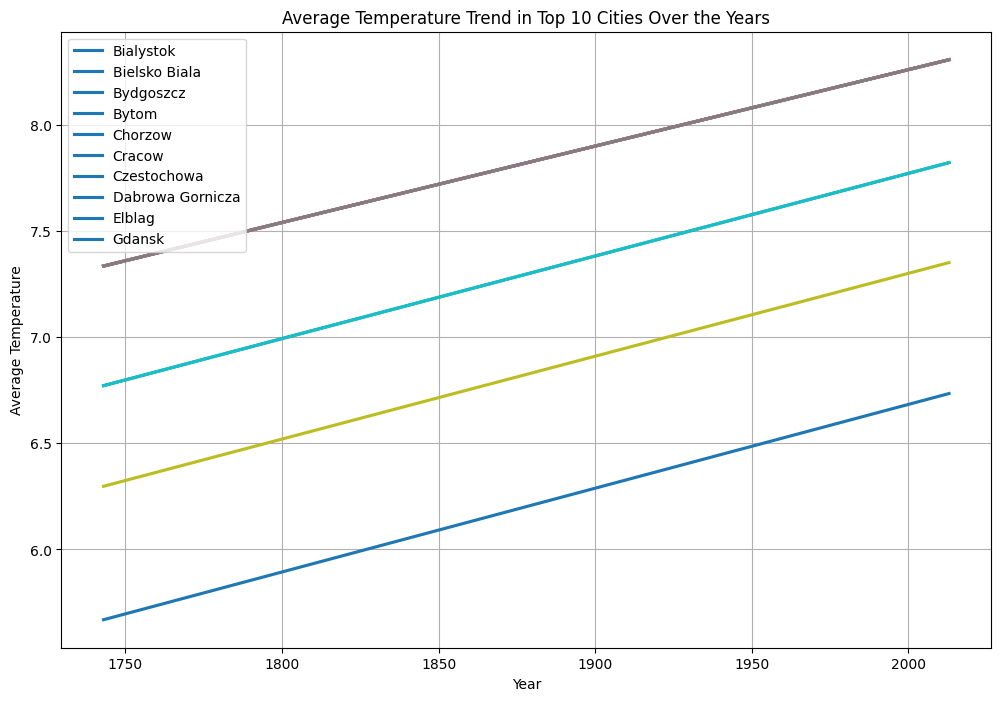

In [41]:
# getting top 10 cities and plotting them 


#top_5_cities = result_df.nlargest(10, 'Subtraction')

# Create a line plot with regression lines for the top 10 cities
plt.figure(figsize=(12, 8))
line_artists = []  # Collect regression line artists
for city in top_5_cities['City']:
    group = grouped.get_group(city)
    reg_model = sns.regplot(x='Year', y='AverageTemperature', data=group, ci=None, label=city,scatter=False)
    line_artists.append(reg_model.lines[0])  # Append the line artist to the list

plt.title('Average Temperature Trend in Top 5 Cities Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature')

# Create the legend using the line artists and city names
plt.legend(handles=line_artists, labels=top_5_cities['City'].tolist(), loc='upper left')
plt.grid(True)
plt.show()